In [1]:
#conda activate AP1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import skew, kurtosis

import pyfolio as pf
import empyrical as emp

/Users/jakobamaya-scott/opt/anaconda3/envs/AP1/lib/python3.11/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [160]:
df = pd.read_excel('data_nn.xlsx')
#df.to_pickle("data_nn.xlsx")

In [161]:
# Set the first column as the date index
df.set_index(df.columns[0], inplace=True)

# Convert the index to string and then to DatetimeIndex format
df.index = pd.to_datetime(df.index.astype(str))

# Filter the data for the last ten years
df_last_10_years = df.loc[df.index > "2021-01-02"]

# Apply rolling sum with a window of 252 and require at least 126 non-NaN values
df_rolling_sum = df_last_10_years.rolling(window=252, min_periods=int(252//2)).sum()

# Forward-fill NaN values, but limit this to a maximum of 5 consecutive fills
df_filled = df_last_10_years.ffill(limit=5)

# Drop any remaining NaN values that still exist after the forward-fill operation
df_cleaned = df_filled.dropna()

#return back original name to not interruppt code.
df_last_10_years = df_cleaned




In [162]:
def refactored_advanced_features(df_returns):
    """
    Refactored computation of advanced financial features to reduce DataFrame fragmentation.
    """
    skew = {}
    kurtosis = {}
    max_drawdown = {}
    volatility = {}
    vaR = {}
    momentum = {}
    avg_return = {}
    rsi = {}

        
        # 1. Skewness
    print("Skewness")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        skew[window] = df_returns.rolling(window).skew()

        # 2. Kurtosis
    print("Kurtosis")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        kurtosis[window]=df_returns.rolling(window).kurt()
    
    # 3. Maximum drawdown
    print("Maximum drawdown")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        max_drawdown[window] = df_returns.rolling(window).apply(emp.max_drawdown, raw=True)
    
    # 4. Volatility
    print("Volatility")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        volatility[window] = df_returns.rolling(window).std()*(252**0.5)
    
    # 5. Value at Risk
    print("Value at Risk")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        vaR[window] = df_returns.rolling(window).apply(emp.value_at_risk, raw=True)
    
    # 6. Momentum
    print("Momentum")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        momentum[window] = df_returns.rolling(window).sum() # ?

    print("Average Return")
    for window in [20, 40, 60, 100, 180, 240, 360, 480]:
        avg_return[window] = df_returns.rolling(window).mean()
    
    return skew, kurtosis, max_drawdown, volatility, vaR, momentum, avg_return

# This function reduces DataFrame fragmentation by constructing all columns and concatenating them at once.

# Läs tommys mex hur de gjorde reversal, sen implementera det. Fixa windows size till vad de hade i rapporten.
# skew[20].head() 

In [163]:
# Call the function and capture the output
skew, kurtosis, max_drawdown, volatility, vaR, momentum, avg_return = refactored_advanced_features(df_last_10_years)


Skewness
Kurtosis
Maximum drawdown
Volatility
Value at Risk
Momentum
Average Return


In [164]:
# Reset the feature DataFrames list
features_df_list = []

# Create individual lists for each feature's DataFrame
skew_df_list = [] 
kurtosis_df_list = []
max_drawdown_df_list = []
volatility_df_list = []
vaR_df_list = []
momentum_df_list = []
avg_return_df_list = []

# Windows configuration
windows = [20, 40, 60, 100, 180, 240, 360, 480]

# Iterate through each feature dictionary and create a DataFrame
for feature_name, feature_dict in [('skew', skew), ('kurtosis', kurtosis), ('max_drawdown', max_drawdown), 
                                   ('volatility', volatility), ('vaR', vaR), ('momentum', momentum), ('avg_return', avg_return)]:
    # Only keep the windows that are present for each feature
    relevant_windows = windows if feature_name != 'kurtosis' else windows[:-1]
    feature_df = pd.concat({f'{feature_name}_{window}': feature_dict[window] for window in relevant_windows}, axis=1)
    
    # Append the individual DataFrame to the corresponding feature list
    if feature_name == 'skew':
        skew_df_list.append(feature_df)
    elif feature_name == 'kurtosis':
        kurtosis_df_list.append(feature_df)
    elif feature_name == 'max_drawdown':
        max_drawdown_df_list.append(feature_df)
    elif feature_name == 'volatility':
        volatility_df_list.append(feature_df)
    elif feature_name == 'vaR':
        vaR_df_list.append(feature_df)
    elif feature_name == 'momentum':
        momentum_df_list.append(feature_df)
    elif feature_name == 'avg_return':
        avg_return_df_list.append(feature_df)
    
    # Add the DataFrame to the main list
    features_df_list.append(feature_df)


# Concatenate all feature DataFrames into a single DataFrame
features_df = pd.concat(features_df_list, axis=1)

# Concatenate all feature DataFrames into a single DataFrame for each feature
if len(skew_df_list) > 1:
    skew_df = pd.concat(skew_df_list, axis=1)
if len(kurtosis_df_list) > 1:
    kurtosis_df = pd.concat(kurtosis_df_list, axis=1)
if len(max_drawdown_df_list) > 1:
    max_drawdown_df = pd.concat(max_drawdown_df_list, axis=1)
if len(volatility_df_list) > 1:
    volatility_df = pd.concat(volatility_df_list, axis=1)
if len(vaR_df_list) > 1:
    vaR_df = pd.concat(vaR_df_list, axis=1)
if len(momentum_df_list) > 1:
    momentum_df = pd.concat(momentum_df_list, axis=1)
if len(avg_return_df_list) > 1:
    avg_return_df = pd.concat(avg_return_df_list, axis=1)



# The individual lists for each feature now contain their respective DataFrames
# And features_df_list contains all the feature DataFrames
# Let's print the first item of each sublist to confirm
#print("Skew DataFrame:\n", skew_df_list[0].tail(), "\n")
#print("Kurtosis DataFrame:\n", kurtosis_df_list[0].tail(), "\n")
#print("Max Drawdown DataFrame:\n", max_drawdown_df_list[0].tail(), "\n")
#print("Volatility DataFrame:\n", volatility_df_list[0].tail(), "\n")
#print("VaR DataFrame:\n", vaR_df_list[0].tail(), "\n")
#print("Momentum DataFrame:\n", momentum_df_list[0].tail(), "\n")
#print("Average Return DataFrame:\n", avg_return_df_list[0].tail(), "\n")

# Print the last 5 rows of the combined DataFrame
features_df.tail()

skew_20                                                         \
           Equities_0 Equities_1 Equities_2 Equities_3 Equities_4 Equities_5   
Column1                                                                        
2023-02-20  -0.240833  -0.198584   0.748803  -0.034554   0.183471  -0.216372   
2023-02-21  -0.086253  -0.070400   0.773535   0.011176   0.312154  -0.041571   
2023-02-22  -0.128589  -0.062873   0.757504  -0.109515   0.415347   0.052482   
2023-02-23  -0.023004   0.106261   0.830820  -0.006954   0.265489   0.092309   
2023-02-24   0.050596   0.138392   0.864532   0.148482   0.428164   0.081861   

                                                        ...  avg_return_480  \
           Equities_6 Equities_7 Equities_8 Equities_9  ... Equity_Sector_1   
Column1                                                 ...                   
2023-02-20   0.256436  -0.157259   1.524128   0.163826  ...        0.000223   
2023-02-21   0.221016  -0.162284   1.521845  -0.296421  ...        0.000203   
2023-02-22   0.191846  -0.470390   1.486008  -0.301710  ...        0.000189   
2023-02-23   0.325509  -0.476984   1.454702  -0.274151  ...        0.000200   
2023-02-24   0.420396  -0.548086   1.506494  -0.256232  ...        0.000202   

                                                                            \
           Equity_Sector_2 Equity_Sector_3 Equity_Sector_4 Equity_Sector_5   
Column1                                                                      
2023-02-20        0.001289        0.000093        0.000232        0.000087   
2023-02-21        0.001335        0.000089        0.000194        0.000060   
2023-02-22        0.001290        0.000056        0.000162        0.000026   
2023-02-23        0.001304        0.000074        0.000161        0.000030   
2023-02-24        0.001269        0.000031        0.000141        0.000001   

                                                                            \
           Equity_Sector_6 Equity_Sector_7 Equity_Sector_8 Equity_Sector_9   
Column1                                                                      
2023-02-20        0.000005        0.000010       -0.000008       -0.000610   
2023-02-21       -0.000026       -0.000004       -0.000074       -0.000646   
2023-02-22       -0.000051       -0.000029       -0.000105       -0.000646   
2023-02-23       -0.000030        0.000023       -0.000123       -0.000627   
2023-02-24       -0.000062        0.000002       -0.000159       -0.000647   

                             
           Equity_Sector_10  
Column1                      
2023-02-20         0.000152  
2023-02-21         0.000083  
2023-02-22         0.000094  
2023-02-23         0.000099  
2023-02-24         0.000093  

[5 rows x 3080 columns]

In [59]:
def RSI(df_returns, window):
    """
    Computes the Relative Strength Index (RSI) for a given window.
    """
    df = df_returns.copy()
    df[df >= 0] = 1
    df[df < 0] = 0
    df = df.rolling(window).mean()*100
    return df

RSI skip for now

In [ ]:
# Initialize an empty dictionary to store the last RSI value for each window
rsi_values = {}

# Calculate RSI for each window and store the last value
for window in [20, 40, 60, 100, 180, 240, 360, 480]:
    rsi_df = RSI(df_last_10_years, window)  # df_returns is your DataFrame with returns data
    last_rsi_value = rsi_df.iloc[-1]  # Get the last row of the RSI DataFrame
    rsi_values[window] = last_rsi_value  # Store it in the dictionary with the window as the key

# Print the last RSI value for a 20-day window
print("Last RSI value for 20-day window:")
print(rsi_values[20])




Forming the DF

In [ ]:
# Define the assets and windows outside of the function for clarity
assets = [
    'Equities_0', 'Equities_1', 'Equities_2', 'Equities_3', 'Equities_4', 'Equities_5', 'Equities_6', 'Equities_7',
    'Equities_8', 'Equities_9', 'Equities_10', 'Equities_11', 'Equities_12', 'Equities_13', 'Equities_14', 'Equities_15',
    'Equities_16', 'FX_0', 'FX_1', 'FX_2', 'FX_3', 'FX_4', 'FX_5', 'FX_6', 'FX_7', 'FX_8', 'FX_9', 'FX_10', 'FX_11',
    'FX_12', 'FX_13', 'Bonds_0', 'Bonds_1', 'Bonds_2', 'Bonds_3', 'Bonds_4', 'Bonds_5', 'Bonds_6', 'Bonds_7', 'Bonds_8',
    'Bonds_9', 'Bonds_10', 'Bonds_11', 'Bonds_12', 'Bonds_13', 'Equity_Sector_0', 'Equity_Sector_1', 'Equity_Sector_2',
    'Equity_Sector_3', 'Equity_Sector_4', 'Equity_Sector_5', 'Equity_Sector_6', 'Equity_Sector_7', 'Equity_Sector_8',
    'Equity_Sector_9', 'Equity_Sector_10'
]
windows = [20, 40, 60, 100, 180, 240, 360, 480]

# Generate the final DataFrame
final_rows = []
for date in df_last_10_years.index:
    for asset in assets:
        row = [date, asset]
        for feature_name, feature_dict in [('skew', skew), ('kurtosis', kurtosis), ('max_drawdown', max_drawdown), 
                                           ('volatility', volatility), ('vaR', vaR), ('momentum', momentum), 
                                           ('avg_return', avg_return)]:
            for window in windows:
                # Check if the window exists for this feature, if not, use NaN
                value = feature_dict[window].loc[date, asset] if window in feature_dict else float('nan')
                row.append(value)
        final_rows.append(row)

# Define the column names for the final DataFrame
column_names = ['Date', 'Asset']
for feature_name in ['skew', 'kurtosis', 'max_drawdown', 'volatility', 'vaR', 'momentum', 'avg_return']:
    for window in windows:
        column_names.extend([f'{feature_name}_{window}'])

# Now create the DataFrame
final_df = pd.DataFrame(final_rows, columns=column_names)

# Show the first few rows of the DataFrame
print(final_df.tail())


NN - Model free revised
Key Changes:
1. Updated Sharpe Ratio Loss: The loss function now accepts both the weights output by the model and the target returns for the next day, using these to calculate the portfolio returns and then the Sharpe Ratio.

2. Target Returns Preparation: The target returns for the next day (target_returns_for_next_day) are prepared by shifting the returns data.

3. Training Loop Adjustments: In the training loop, the loss is calculated using both the weights and the target returns for the next day.

4. Data Splitting and Scaling: The data is split into training and test sets, with the target returns aligned with the feature data.

5. Splitting the data over time instead of doing it randomly

6. Changed y to y_test in portfolio_returns


Output Layer Weights: [[ 0.01939186 -0.10157679  0.22696948 ... -0.04940829 -0.05476796
  -0.30961162]
 [-0.12446218 -0.10159729 -0.20836622 ... -0.0530806  -0.22827803
   0.03334362]
 [-0.11261071 -0.16169731 -0.01651047 ...  0.01529291 -0.30416557
  -0.2305846 ]
 ...
 [ 0.0867712   0.01682971 -0.16454959 ... -0.03370283 -0.12476318
  -0.30388552]
 [ 0.11356875  0.10289252  0.15720649 ...  0.05061893 -0.05335145
   0.10381521]
 [ 0.21798764  0.01790309 -0.3036597  ...  0.0686375  -0.0550594
   0.01818127]]
Output Layer Biases: [-0.0057812  -0.29230988 -0.29998678  0.7690713  -0.05062212 -0.08945173
  0.69424003  0.04239209  0.07130884 -0.21966575  0.41879088  0.34363294
 -0.3727434   0.11018158 -0.09036026 -0.04685932  0.11708815 -0.2226147
  0.04930645 -0.05412884 -0.30450138 -0.22810628 -0.02787481 -0.327712
  0.13268468 -0.11842833  0.12548661 -0.20445825 -0.03807184 -0.22430271
 -0.21323279 -0.10742055 -0.21005891  0.13750628 -0.3305872  -0.283457
 -0.23912573 -0.6429345  -0.10082

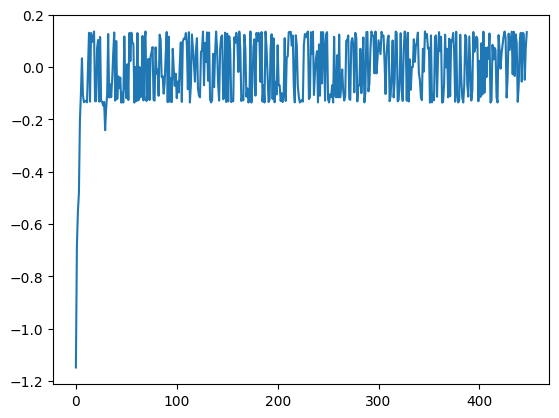

'\n# Evaluate the model\nmodel.eval()\nwith torch.no_grad():  # Turn off gradients for validation, saves memory and computations\n    neural_network_output = model(X_test_tensor).cpu().numpy()\n\n# Normalize the predicted weights\n# Reshape the output to 2D if necessary and then normalize, somehow the output became 3D??\nneural_network_output_reshaped = neural_network_output.reshape(-1, neural_network_output.shape[-1])\nnormalized_predicted_weights = neural_network_output_reshaped / np.sum(neural_network_output_reshaped, axis=1, keepdims=True)\n\n# Convert the normalized predicted weights to DataFrame\nweights_df = pd.DataFrame(normalized_predicted_weights, columns=y.columns)\n\n\n# Check if the lengths match\nif len(weights_df) == len(y_test):\n    weights_df.index = y_test.index\nelse:\n    sys.exit("not same length")\n\n# Calculate weighted returns\nportfolio_returns = weights_df.shift(1).mul(y_test).dropna(how=\'all\')\n\n# Calculate cumulative portfolio returns and plot\ncumulativ

In [165]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt

# Define the neural network model
class MultivariateNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultivariateNN, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.input_layer(x))
        x = F.softmax(self.hidden_layer(x), dim=1)  # Ensure softmax is applied across columns
        return x

# Custom Sharpe Ratio Loss (modified to use portfolio returns)
# This SharpeRatioLoss now calculates the Sharpe Ratio using portfolio returns 
# instead of just the outputs of the neural network
class SharpeRatioLoss(nn.Module):
    def __init__(self, risk_free_rate=0):
        super(SharpeRatioLoss, self).__init__()
        self.risk_free_rate = risk_free_rate

    def forward(self, weights, target_returns):
        # Calculate portfolio returns (Added)
        portfolio_returns = (weights * target_returns)
        # Calculate Sharpe Ratio
        expected_return = portfolio_returns.mean()
        std_dev_return = portfolio_returns.std()
        sharpe_ratio = (expected_return - self.risk_free_rate) / (std_dev_return + 1e-6)
        return -sharpe_ratio


# Assuming 'feature_df' is your dataset as a pandas DataFrame
# Calculated features must be part of 'feature_df'
calculated_features_df = pd.DataFrame(feature_df)
features_df = calculated_features_df.fillna(calculated_features_df.mean())

# Split the data into features and returns
X = features_df
y = df_last_10_years.drop(columns=df_last_10_years.columns[0])  

# Prepare target returns for the next day (for Sharpe Ratio Loss)
# The target returns for the next day are prepared for the Sharpe Ratio Loss calculation.
#target_returns_for_next_day = y.shift(-1).fillna(0)
#print(target_returns_for_next_day.size)

"""Here is how we should do with target returns next day, but need to fix the dimensions"""
target_returns_for_next_day = y.shift(-1).dropna()
#print(target_returns_for_next_day.size)
#sys.exit("bla")

# Calculate the split index for 80% of the data
split_index = int(len(X) * 0.8)


# Split the data into training and testing sets
X_train = X.iloc[:split_index]
y_train = target_returns_for_next_day.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = target_returns_for_next_day.iloc[split_index:]

# Scaling the data, same as before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting to PyTorch tensors, added y train tensor and y test tensor
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Initialize the neural network model, same as before
input_dim = X_train_tensor.shape[1] # Specify the number of input features
hidden_dim = 32  # Specify the number of neurons in the hidden layer
output_dim = y_train_tensor.shape[1]  # Number of columns to predict
model = MultivariateNN(input_dim, hidden_dim, output_dim)

# Loss and optimizer, same as before
criterion = SharpeRatioLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Convert y_train_tensor to PyTorch tensor if it's not already
y_train_tensor = torch.FloatTensor(y_train.values)
share_ratio_over_time = []
time = []
for i in range(y_train_tensor.shape[0]):
    y_target = y_train_tensor[i].unsqueeze(0)  # Reshape to (1, output_dim)
    # Training loop
    epochs = 50
    time.append(i)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        weights = model(X_train_tensor)

        # Calculate loss using the target returns for the next day
        loss = criterion(weights, y_target)
        loss.backward()
        optimizer.step()
        
    share_ratio_over_time.append(loss)
        # Optional: Print loss every N epochs
        #if (epoch + 1) % 10 == 0:
            #print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}") 
""""
#Det gammla
# Training loop
epochs = 50
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()
    # Forward pass, same as before
    weights = model(X_train_tensor)
    # Calculate loss using the target returns for the next day
    loss = criterion(weights, y_train_tensor)  # Now using target returns for loss calculation, added weights here
    print(weights.shape)
    print(y_train_tensor.shape)
    sys.exit("bla")
    loss.backward()
    optimizer.step()
    
    # Optional: Print loss every N epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
"""

# Extracting only the weights (and biases, if needed) of the output layer, same as before
output_layer_weights = model.hidden_layer.weight.data.cpu().numpy()
output_layer_biases = model.hidden_layer.bias.data.cpu().numpy()

# You can now use output_layer_weights and output_layer_biases as needed, same as before
print("Output Layer Weights:", output_layer_weights)
print("Output Layer Biases:", output_layer_biases)

sharpe_new = []
for i in share_ratio_over_time:
    sharpe_new.append(i.item())  # if i is a single-element tensor)

plt.plot(time, sharpe_new)
plt.show()

"""
# Evaluate the model
model.eval()
with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
    neural_network_output = model(X_test_tensor).cpu().numpy()

# Normalize the predicted weights
# Reshape the output to 2D if necessary and then normalize, somehow the output became 3D??
neural_network_output_reshaped = neural_network_output.reshape(-1, neural_network_output.shape[-1])
normalized_predicted_weights = neural_network_output_reshaped / np.sum(neural_network_output_reshaped, axis=1, keepdims=True)

# Convert the normalized predicted weights to DataFrame
weights_df = pd.DataFrame(normalized_predicted_weights, columns=y.columns)


# Check if the lengths match
if len(weights_df) == len(y_test):
    weights_df.index = y_test.index
else:
    sys.exit("not same length")

# Calculate weighted returns
portfolio_returns = weights_df.shift(1).mul(y_test).dropna(how='all')

# Calculate cumulative portfolio returns and plot
cumulative_returns = portfolio_returns.sum(axis=1).cumsum()
cumulative_returns.plot()"""


100%|██████████| 50/50 [00:00<00:00, 134.57it/s]


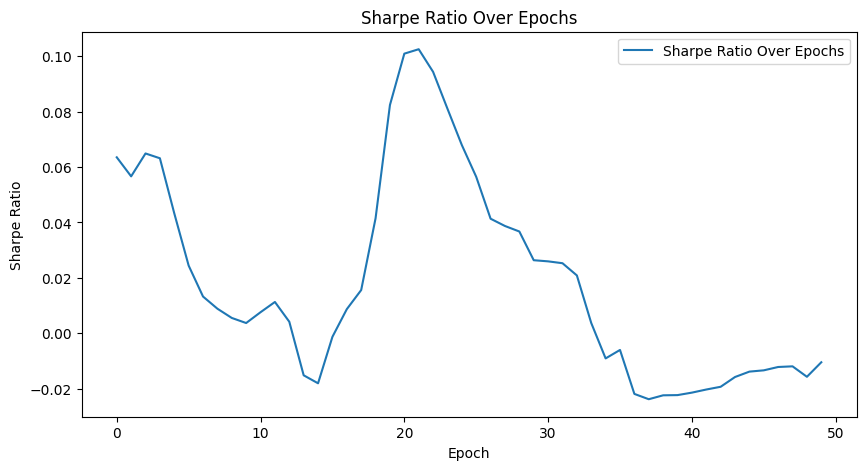

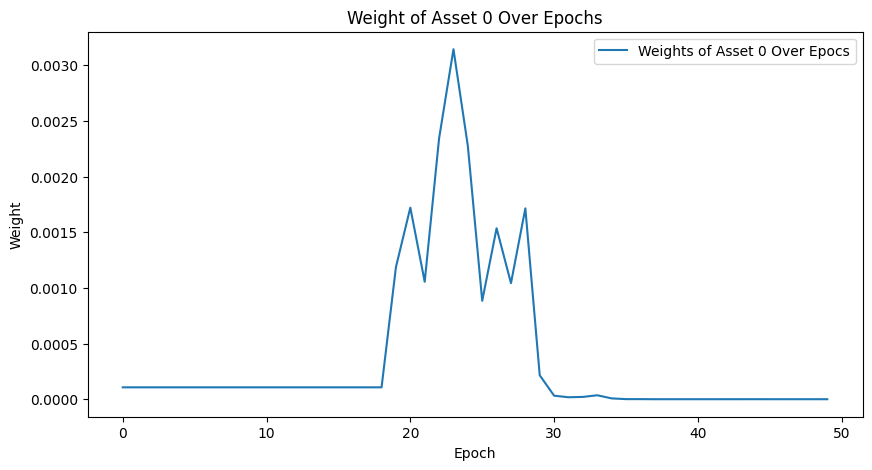

/Users/jakobamaya-scott/opt/anaconda3/envs/AP1/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/jakobamaya-scott/opt/anaconda3/envs/AP1/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/jakobamaya-scott/opt/anaconda3/envs/AP1/lib/python3.11/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
/Users/jakobamaya-scott/opt/anaconda3/envs/AP1/lib/python3.11/site-packages/matplotlib/axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed

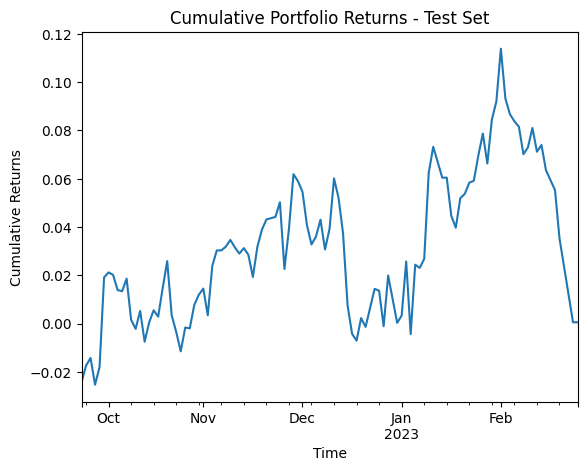

In [168]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the neural network model
class MultivariateNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultivariateNN, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.input_layer(x))
        x = F.softmax(self.hidden_layer(x), dim=1)
        return x

# Custom Sharpe Ratio Loss
class SharpeRatioLoss(nn.Module):
    def __init__(self, risk_free_rate=0):
        super(SharpeRatioLoss, self).__init__()
        self.risk_free_rate = risk_free_rate

    def forward(self, weights, target_returns):
        portfolio_returns = (weights * target_returns).sum(dim=1)
        expected_return = portfolio_returns.mean()
        std_dev_return = portfolio_returns.std()
        sharpe_ratio = (expected_return - self.risk_free_rate) / (std_dev_return + 1e-6)
        return -sharpe_ratio

# Assuming 'feature_df' is your dataset as a pandas DataFrame
calculated_features_df = pd.DataFrame(feature_df)
features_df = calculated_features_df.fillna(calculated_features_df.mean())
X = features_df
y = df_last_10_years.drop(columns=df_last_10_years.columns[0])
target_returns_for_next_day = y.shift(-1).fillna(0)

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train = X.iloc[:split_index]
y_train = target_returns_for_next_day.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = target_returns_for_next_day.iloc[split_index:]

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Initialize the neural network model
input_dim = X_train_tensor.shape[1]
hidden_dim = 32
output_dim = y_train_tensor.shape[1]
model = MultivariateNN(input_dim, hidden_dim, output_dim)

# Loss and optimizer
criterion = SharpeRatioLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
weights_over_time = []
sharpe_ratios_over_time = []
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()
    weights = model(X_train_tensor)
    loss = criterion(weights, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor)
        weights_over_time.append(test_output.cpu().numpy())
        sharpe_ratios_over_time.append(-test_loss.item())

# Plot Sharpe Ratio over time
plt.figure(figsize=(10, 5))
plt.plot(sharpe_ratios_over_time, label="Sharpe Ratio Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio Over Epochs")
plt.legend()
plt.show()

# Plot weights over time for a specific asset
asset_index = 0  # Adjust this index to plot weights for different assets
weights_of_asset = [weights[epoch][asset_index].detach().numpy() for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(weights_of_asset, label=f"Weights of Asset {asset_index} Over Epocs")
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.title(f"Weight of Asset {asset_index} Over Epochs")
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    neural_network_output = model(X_test_tensor).cpu().numpy()
    neural_network_output_reshaped = neural_network_output.reshape(-1, neural_network_output.shape[-1])
    normalized_predicted_weights = neural_network_output_reshaped / np.sum(neural_network_output_reshaped, axis=1, keepdims=True)

# Convert the normalized predicted weights to DataFrame
weights_df = pd.DataFrame(normalized_predicted_weights, columns=y.columns)
if len(weights_df) == len(y_test):
    weights_df.index = y_test.index
else:
    sys.exit("Lengths of weights and test data do not match")

# Calculate weighted returns
portfolio_returns = weights_df.shift(1).mul(y_test).dropna(how='all')
cumulative_returns = portfolio_returns.sum(axis=1).cumsum()

# Plot cumulative portfolio returns
cumulative_returns.plot(title='Cumulative Portfolio Returns - Test Set')
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.show()


NN - Model Based

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cvxpy as cp
import numpy as np

class RiskBudgetingLayer(nn.Module):
    def __init__(self, n_assets, risk_budgets):
        super(RiskBudgetingLayer, self).__init__()
        self.n_assets = n_assets
        self.risk_budgets = risk_budgets

    def forward(self, x):
        # Calculate covariance matrix
        covariance_matrix = torch.cov(x.T).detach().cpu().numpy()
        assert covariance_matrix.shape[0] == covariance_matrix.shape[1], "Covariance matrix is not square"

        # Ensure positive semi-definiteness of the covariance matrix
        covariance_matrix = (covariance_matrix + covariance_matrix.T) / 2
        eigenvalues, _ = np.linalg.eigh(covariance_matrix)
        covariance_matrix += np.eye(self.n_assets) * np.maximum(0, -eigenvalues.min() + 1e-6)

        # Convex optimization
        y = cp.Variable(self.n_assets)
        objective = cp.Minimize(cp.sqrt(cp.quad_form(y, covariance_matrix)))
        constraints = [cp.sum(cp.multiply(self.risk_budgets, cp.log(y))) >= 1, y >= 1e-5]
        problem = cp.Problem(objective, constraints)
        problem.solve(solver=cp.SCS, qcp=True, eps=1e-5, max_iters=100)
        optimized_allocation = y.value

        # Check for invalid values and handle them
        if optimized_allocation is None or np.any(np.isnan(optimized_allocation)):
            optimized_allocation = np.ones(self.n_assets) / self.n_assets  # Fallback to equal allocation

        # Convert back to PyTorch tensor with a differentiable operation
        optimized_allocation_tensor = torch.tensor(optimized_allocation, dtype=torch.float, requires_grad=True)

        # Apply softmax to ensure the output sums to 1
        return F.softmax(optimized_allocation_tensor * 1.0, dim=0)



class MultivariateNNWithRiskBudgeting(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_assets, risk_budgets):
        super(MultivariateNNWithRiskBudgeting, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, hidden_dim)
        self.risk_budgeting_layer = RiskBudgetingLayer(n_assets, risk_budgets)
        
    def forward(self, x):
        x = F.leaky_relu(self.input_layer(x))
        x = F.softmax(self.hidden_layer(x), dim=1)
        x = self.risk_budgeting_layer(x)
        return x

# Assuming the data and necessary variables are already defined as per your notebook
# Example usage
input_dim = X_train_tensor.shape[1]
hidden_dim = 55
n_assets = y_train.shape[1]
risk_budgets = np.ones(n_assets) / n_assets  # Example risk budgets, equal for each asset

model = MultivariateNNWithRiskBudgeting(input_dim, hidden_dim, n_assets, risk_budgets)

# Continue with the existing training loop and loss function

# Loss and optimizer
criterion = SharpeRatioLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Training loop
epochs = 50
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs)
    loss.backward()
    optimizer.step()

    # Optional: Print loss every N epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Extracting only the weights (and biases, if needed) of the output layer
output_layer_weights = model.hidden_layer.weight.data.cpu().numpy()
output_layer_biases = model.hidden_layer.bias.data.cpu().numpy()

# You can now use output_layer_weights and output_layer_biases as needed
print("Output Layer Weights:", output_layer_weights)
print("Output Layer Biases:", output_layer_biases)

# Evaluate the model
model.eval()
with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
    neural_network_output = model(X_test_tensor).cpu().numpy()
# Now neural_network_output contains the output of the neural network
print("Neural Network Output:", neural_network_output)
##print the dimensions of neural network
print("Neural Network Output shape:", neural_network_output.shape)
#with torch.no_grad():
    #train_outputs = model(X_train_tensor)
    #test_outputs = model(X_test_tensor)
    #train_loss = criterion(train_outputs)
    #test_loss = criterion(test_outputs)
    #print(f"Final Training Loss: {train_loss.item()}")
    #print(f"Final Test Loss: {test_loss.item()}")

print("Shape of neural network output:", neural_network_output.shape)

# Normalize the predicted weights
normalized_predicted_weights = neural_network_output / np.sum(neural_network_output)

# Convert the normalized predicted weights to DataFrame
weights_df = pd.DataFrame([normalized_predicted_weights], columns=returns.columns)

# Replicate the weights across the dates in the returns DataFrame
weights_df = pd.concat([weights_df]*len(returns), ignore_index=True)
weights_df.index = returns.index

# Calculate weighted returns
portfolio_returns = weights_df.shift(1).mul(returns).dropna(how='all')

# Calculate cumulative portfolio returns and plot
cumulative_returns = portfolio_returns.sum(axis=1).cumsum()
cumulative_returns.plot()

  0%|          | 0/50 [00:00<?, ?it/s]


TypeError: SharpeRatioLoss.forward() missing 1 required positional argument: 'target_returns'

NN - Model Based Revised, not done

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import cvxpy as cp
from cvxpylayers.torch import CvxpyLayer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Custom Sharpe Ratio Loss (same as in the model-free approach)
class SharpeRatioLoss(nn.Module):
    def __init__(self, risk_free_rate=0):
        super(SharpeRatioLoss, self).__init__()
        self.risk_free_rate = risk_free_rate

    def forward(self, weights, target_returns):
        # Calculate portfolio returns
        portfolio_returns = (weights * target_returns).sum(dim=1)
        # Calculate Sharpe Ratio
        expected_return = portfolio_returns.mean()
        std_dev_return = portfolio_returns.std()
        sharpe_ratio = (expected_return - self.risk_free_rate) / (std_dev_return + 1e-6)
        return -sharpe_ratio

# Risk Budgeting Layer using cvxpy
class RiskBudgetingLayer(nn.Module):
    def __init__(self, num_assets, c_value):
        super(RiskBudgetingLayer, self).__init__()
        self.num_assets = num_assets
        self.c_value = c_value

    def forward(self, cov_matrix):
        # Define the optimization problem for risk budgeting
        weights = cp.Variable(self.num_assets)
        objective = cp.Minimize(cp.quad_form(weights, cov_matrix))
        constraints = [cp.sum(weights) == 1, weights >= 0]  # Example constraints
        problem = cp.Problem(objective, constraints)
        cvxpy_layer = CvxpyLayer(problem, parameters=[cov_matrix], variables=[weights])
        optimized_weights, = cvxpy_layer(cov_matrix)
        return optimized_weights

# Neural Network with Risk Budgeting Layer
class ModelBased(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_assets, c_value):
        super(ModelBased, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_assets)
        self.risk_budget_layer = RiskBudgetingLayer(num_assets, c_value)
        
    def forward(self, x, cov_matrix):
        x = F.leaky_relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        optimized_weights = self.risk_budget_layer(cov_matrix)
        return optimized_weights

# Assuming 'feature_df' and 'df_last_10_years' are defined as per your data
calculated_features_df = pd.DataFrame(feature_df)
features_df = calculated_features_df.fillna(calculated_features_df.mean())
X = features_df
y = df_last_10_years.drop(columns=df_last_10_years.columns[0])  # Assuming this is the returns data

# Prepare target returns for the next day (for Sharpe Ratio Loss)
target_returns_for_next_day = y.shift(-1).fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target_returns_for_next_day, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Initialize the model-based neural network
input_dim = X_train_tensor.shape[1]
hidden_dim = 32  # Example hidden dimension
num_assets = y_train_tensor.shape[1]
c_value = 1  # Example c_value for risk budgeting

model = ModelBased(input_dim, hidden_dim, num_assets, c_value)

# Loss and optimizer
criterion = SharpeRatioLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()

    # Example covariance matrix calculation (replace with actual data)
    cov_matrix = torch.rand(num_assets, num_assets)  # Replace with actual covariance matrix

    # Forward pass (passing covariance matrix to the model)
    portfolio_weights = model(X_train_tensor, cov_matrix)
    loss = criterion(portfolio_weights, y_train_tensor)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
with torch.no_grad():
    # Assuming test data is prepared similarly to training data
    cov_matrix_test = torch.rand(num_assets, num_assets)  # Replace with actual test covariance matrix
    neural_network_output = model(X_test_tensor, cov_matrix_test).cpu().numpy()

# Normalize the predicted weights
normalized_predicted_weights = neural_network_output / np.sum(neural_network_output, axis=1, keepdims=True)

# Convert the normalized predicted weights to DataFrame
weights_df = pd.DataFrame(normalized_predicted_weights, columns=y_test.columns)

# Align the weights DataFrame with the test returns DataFrame
# Check if the lengths match
if len(weights_df) == len(y_test):
    weights_df.index = y_test.index
else:
    # Truncate the returns DataFrame to match the length of the weights DataFrame
    truncated_y_test = y_test.iloc[:len(weights_df)]
    weights_df.index = truncated_y_test.index

# Calculate weighted returns for the test set
portfolio_returns_test = weights_df.shift(1).mul(truncated_y_test).dropna(how='all')

# Calculate cumulative portfolio returns and plot
cumulative_returns_test = portfolio_returns_test.sum(axis=1).cumsum()
cumulative_returns_test.plot(title='Cumulative Portfolio Returns - Test Set')

Risk budgeting benchmark

AP1 risk budgetering

100%|██████████| 154/154 [07:45<00:00,  3.02s/it]


<Axes: >

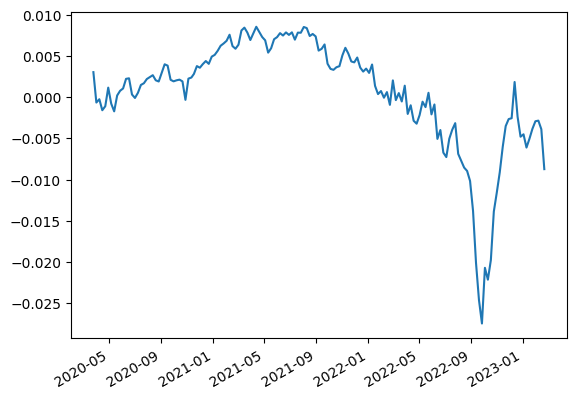

In [227]:
import cvxpy as cp
from tqdm import tqdm
from joblib import Parallel, delayed
# Assuming df_last_10_years contains the daily returns
returns = df_last_10_years.drop(columns=df_last_10_years.columns[0])
n_assets = len(returns.columns)
# Define a function that will be parallelized
def optimize_weights(t, returns, n_assets):
    b = np.ones(n_assets) / n_assets  # For example, equal risk budgeting
    c = 1
    # Code that was originally in your for-loop goes here
    # For example:
    data_t = returns.iloc[:t]
    cov_matrix_values = data_t.cov().values
    cov_matrix_values = (cov_matrix_values + cov_matrix_values.T)/2
    y = cp.Variable(shape=n_assets)
    # Objective function: Minimize the square root of the portfolio variance
    objective = cp.Minimize(cp.sqrt(cp.quad_form(y, cp.psd_wrap(cov_matrix_values))))
    constraints = [
        cp.sum(cp.multiply(b, cp.log(y))) >= c,
        y >= 1e-5 #strict inequalities are not allowed
    ]
    # Formulate the optimization problem
    problem = cp.Problem(objective, constraints)
    # Solve the problem using a suitable solver
    problem.solve(solver=cp.SCS,qcp=True, eps = 1e-5, max_iters  = 100) 

    # Extract the results
    optimal_weights = y.value
    date = data_t.index[-1]
    # Return the results for this iteration
    return (date, optimal_weights)

# Precompute any variables that don't change inside the loop
# ...

# Set up the joblib parallelization
# Here, 'range(len(returns))' is the range over which you want to parallelize
# results = Parallel(n_jobs=-1)(delayed(optimize_weights)(t, returns, n_assets) for t in tqdm(range(54, len(returns))))
# Set up the joblib parallelization with tqdm
results = Parallel(n_jobs=-1)(delayed(optimize_weights)(t, returns, n_assets) for t in tqdm(range(54, len(returns), 5))
)
# After parallelization, recombine the results as necessary
# For example:
# Create a dictionary with dates as keys and optimal weights as values
optimal_weights_dict = {date: weights for date, weights in results}

w = pd.DataFrame.from_dict(optimal_weights_dict, orient='index', columns=returns.columns)
# Normalize the weights
w = w.div(w.sum(axis=1), axis=0)
# Calculate the portfolio returns
portfolio_returns = w.shift(1).mul(returns).dropna(how='all')
portfolio_returns.sum(axis=1).cumsum().plot()